## Data process and cleaning

In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install -U scikit-learn
!pip install textstat
### login to the Hugging Face
!pip install transformers datasets accelerate
!pip install huggingface_hub transformers datasets accelerate peft bitsandbytes torch openpyxl bert_score
!pip install --upgrade transformers
!pip install bert_score --quiet
!pip install datasets
## Matrics
!pip install evaluate
!pip install evaluate rouge_score nltk absl-py
!pip install nltk
!pip install sacrebleu


In [3]:
import sys
print(sys.executable)


/venv/main/bin/python


In [4]:
# Upload the file - method 2: upload the dataset in your drive and read the dataset through google drive
# If you have not installed the package:
# pip install pandas
import pandas as pd

df = pd.read_csv("2479-MedQuAD.csv")
print(df.head())


                AnswerID                                             Answer  \
0  ADAM_0003147_Sec1.txt  Question: What is (are) Polycystic ovary syndr...   
1  ADAM_0003147_Sec2.txt  Question: What causes Polycystic ovary syndrom...   
2  ADAM_0002818_Sec2.txt  Question: What causes Noonan syndrome ?\nURL: ...   
3  ADAM_0002818_Sec7.txt  Question: What are the complications of Noonan...   
4  ADAM_0002818_Sec9.txt  Question: How to prevent Noonan syndrome ?\nUR...   

     Unnamed: 2             Unnamed: 3  
0  1-Incorrect   ADAM_0003147_Sec1.txt  
1  1-Incorrect   ADAM_0003147_Sec2.txt  
2  2-Related AD    AM_0002818_Sec2.txt  
3  2-Related AD    AM_0002818_Sec7.txt  
4  2-Related AD    AM_0002818_Sec9.txt  


In [5]:
import pandas as pd
import re
# Load your dataset
df = df[df['Unnamed: 2'].astype(str).str.contains('Excellent|Incomplete', na=False)]
# Print how many data
print(f"Rows with 'Excellent' or 'Incomplete': {len(df)}")


Rows with 'Excellent' or 'Incomplete': 150


In [6]:
# Step 2: Extract Question and Answer from the 'Answer' column
def extract_question_answer(text):
    # Remove URL
    text = re.sub(r'URL:\s*\S+', '', str(text))

    # Extract Question and Answer using regex
    question_match = re.search(r'Question:\s*(.*?)\s*Answer:', text)
    answer_match = re.search(r'Answer:\s*(.*)', text)
    question = question_match.group(1).strip() if question_match else None
    answer = answer_match.group(1).strip() if answer_match else None

    return pd.Series([question, answer])

# Apply function to the 'Answer' column (not 'combined')
df[['question', 'answer']] = df['Answer'].apply(extract_question_answer)

# Save final result
df.to_csv('filtered_questions_answers.csv', index=False)

# Preview
print(df[['question', 'answer']].head())


                                             question  \
10                    What is (are) Noonan syndrome ?   
11                      What causes Noonan syndrome ?   
12  What is (are) Noonan syndrome ? (Also called: ...   
13  What are the symptoms of Noonan syndrome ? (Al...   
14  Is Noonan syndrome inherited ? (Also called: M...   

                                               answer  
10  Noonan syndrome is a disease that can be passe...  
11  Noonan syndrome is linked to defects in severa...  
12  Noonan syndrome is a genetic disorder that cau...  
13  What are the signs and symptoms of Noonan synd...  
14  How is Noonan syndrome inherited? Noonan syndr...  


In [7]:
# Step 4: Save the clean data to CSV
df.to_csv('MedQuDA_2000.csv', index=False)
print(df[['question', 'answer']].head())
# Print how many clean rows are left
print(f"Remaining number of Q&A pairs: {len(df)}")


                                             question  \
10                    What is (are) Noonan syndrome ?   
11                      What causes Noonan syndrome ?   
12  What is (are) Noonan syndrome ? (Also called: ...   
13  What are the symptoms of Noonan syndrome ? (Al...   
14  Is Noonan syndrome inherited ? (Also called: M...   

                                               answer  
10  Noonan syndrome is a disease that can be passe...  
11  Noonan syndrome is linked to defects in severa...  
12  Noonan syndrome is a genetic disorder that cau...  
13  What are the signs and symptoms of Noonan synd...  
14  How is Noonan syndrome inherited? Noonan syndr...  
Remaining number of Q&A pairs: 150


In [8]:
from IPython.display import FileLink
# Provide the path to your file
file_path = 'MedQuDA_2000.csv'
# Create a downloadable link
FileLink(file_path)

/5052/MedQuDA_2000.csv

## Explanation of data cleaning and processing



To prepare the dataset for training and evaluation, I performed a series of data cleaning and filtering steps to ensure high-quality question–answer (QA) pairs. Starting with an initial dataset of 2,479 entries, I narrowed it down to a focused subset of 150 QA pairs. This reduction was achieved by filtering based on an evaluation column that assessed the quality of each QA pair. Specifically, I retained only those entries that were labeled as “Excellent” and "Incomplete" in the evaluation field. These “Excellent” ratings indicate that both the question and answer were factually accurate, relevant, and clearly formulated—making them ideal candidates for training or benchmarking a language model.

This filtering step was essential to maintain data integrity and reliability, particularly for fine-tuning or testing the model's ability to generate medically accurate and user-friendly responses. By prioritizing quality over quantity, I ensured that the resulting dataset would support meaningful and trustworthy model outputs.

# Visualization the dataset and interpretation

In [9]:
import pandas as pd

df = pd.read_csv("MedQuDA_2000.csv")
df = df.dropna(subset=["question", "answer"])  # Ensure no NaNs
df.head()


,AnswerID,Answer,Unnamed: 2,Unnamed: 3,question,answer
0,ADAM_0002818_Sec1.txt,Question: What is (are) Noonan syndrome ?\nURL...,3-Incomplete,ADAM_0002818_Sec1.txt,What is (are) Noonan syndrome ?,Noonan syndrome is a disease that can be passe...
1,ADAM_0002818_Sec2.txt,Question: What causes Noonan syndrome ?\nURL: ...,3-Incomplete,ADAM_0002818_Sec2.txt,What causes Noonan syndrome ?,Noonan syndrome is linked to defects in severa...
2,GARD_0004450_Sec1.txt,Question: What is (are) Noonan syndrome ? (Als...,3-Incomplete,GARD_0004450_Sec1.txt,What is (are) Noonan syndrome ? (Also called: ...,Noonan syndrome is a genetic disorder that cau...
3,GARD_0004450_Sec2.txt,Question: What are the symptoms of Noonan synd...,3-Incomplete,GARD_0004450_Sec2.txt,What are the symptoms of Noonan syndrome ? (Al...,What are the signs and symptoms of Noonan synd...
4,GARD_0004450_Sec3.txt,Question: Is Noonan syndrome inherited ? (Also...,3-Incomplete,GARD_0004450_Sec3.txt,Is Noonan syndrome inherited ? (Also called: M...,How is Noonan syndrome inherited? Noonan syndr...


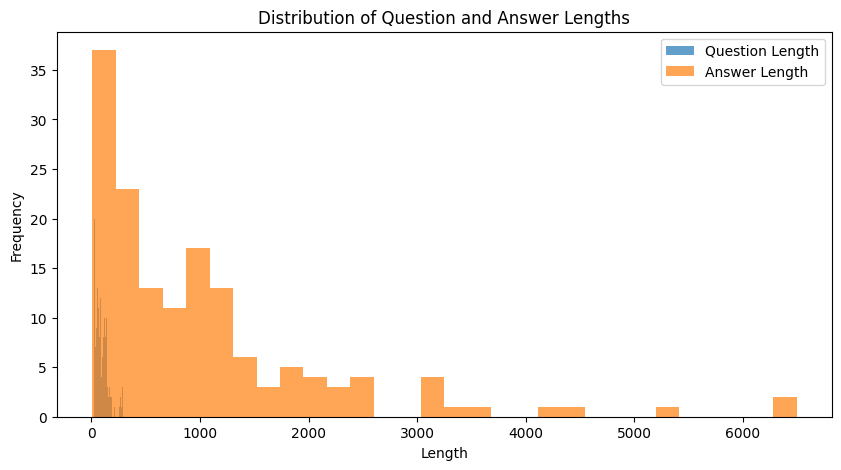

In [10]:
import matplotlib.pyplot as plt

df["q_len"] = df["question"].apply(len)
df["a_len"] = df["answer"].apply(len)

plt.figure(figsize=(10, 5))
plt.hist(df["q_len"], bins=30, alpha=0.7, label="Question Length")
plt.hist(df["a_len"], bins=30, alpha=0.7, label="Answer Length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Distribution of Question and Answer Lengths")
plt.legend()
plt.show()

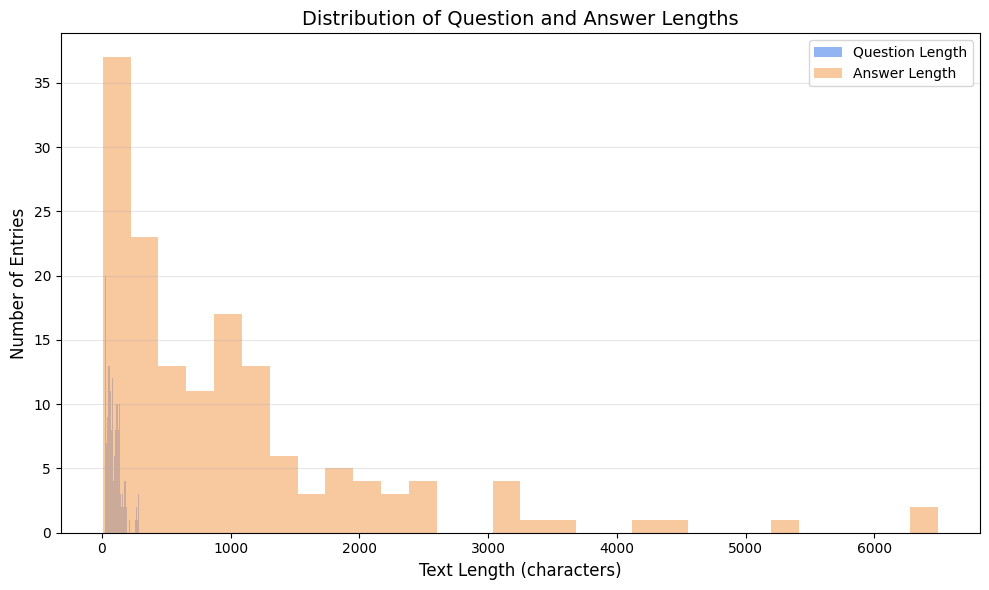

In [11]:
import matplotlib.pyplot as plt
df["q_len"] = df["question"].apply(len)
df["a_len"] = df["answer"].apply(len)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Use alpha to distinguish overlapping bars
plt.hist(df["q_len"], bins=30, alpha=0.7, label="Question Length", color='cornflowerblue')
plt.hist(df["a_len"], bins=30, alpha=0.6, label="Answer Length", color='sandybrown')

plt.title("Distribution of Question and Answer Lengths", fontsize=14)
plt.xlabel("Text Length (characters)", fontsize=12)
plt.ylabel("Number of Entries", fontsize=12)
plt.legend()
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


Interpretation

The histogram displays the distribution of text lengths for questions and answers in the MedQuAD dataset. Most questions are short — typically under 200 characters — indicating they are concise and likely to-the-point (e.g., “What is asthma?”). Meanwhile, answers show a much broader range of lengths, spanning from under 200 to over 6,000 characters. This reflects the complexity of medical responses, which often involve detailed explanations, lists of symptoms or treatments, and nuanced distinctions between related conditions.

The peak in both distributions occurs around the 0–200 character mark, but answer lengths are significantly more spread out with a long right tail. This is a positive insight for model training: it confirms that question length is relatively consistent, whereas answer length varies widely, helping us decide generation limits (e.g., max_new_tokens).

## Question vs. Answer Length Scatter Plot

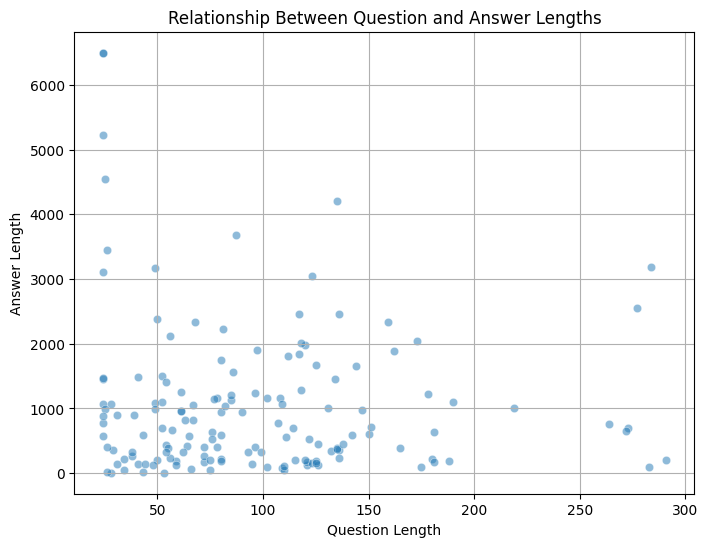

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["q_len"], y=df["a_len"], alpha=0.5)
plt.title("Relationship Between Question and Answer Lengths")
plt.xlabel("Question Length")
plt.ylabel("Answer Length")
plt.grid(True)
plt.show()

Interpretation

The scatter plot highlights a non-linear and low correlation between question and answer lengths. This variability suggests that answer generation is influenced more by content than form, which is an important consideration when fine-tuning language models for medical Q&A tasks. It also implies that token truncation strategies during model training should be designed with this wide range of answer lengths in mind.

## Top-N Frequent Medical Terms (NER/Keyword Extraction)

<Axes: >

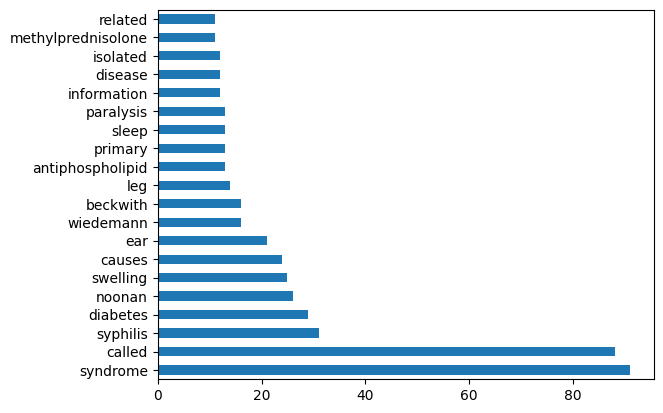

In [13]:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=20, stop_words='english')
X = vectorizer.fit_transform(df['question'])

import pandas as pd
pd.Series(X.toarray().sum(axis=0), index=vectorizer.get_feature_names_out()).sort_values(ascending=False).plot(kind='barh')

Interpretation

The distribution of terms highlights a strong bias toward clinical diagnosis, symptom understanding, and condition naming. It also reveals that both general (e.g., diabetes, syndrome) and rare conditions are present in user queries. This insight could be used to guide model fine-tuning, e.g., prioritizing accurate definitions and symptom mapping in language model outputs.

## Answer Complexity Score (Flesch Reading Ease or Similar)

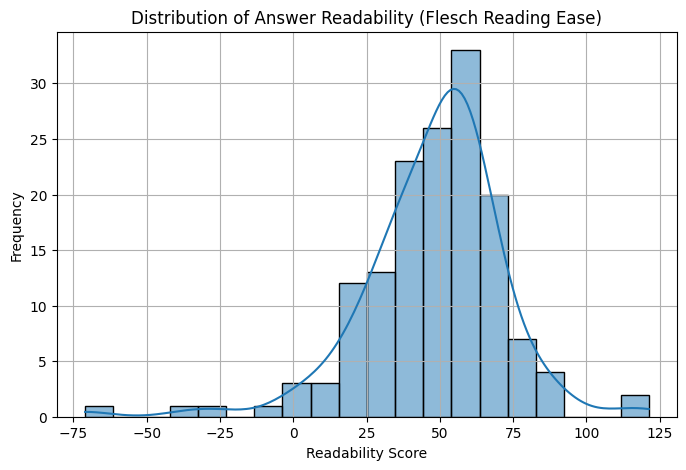

In [14]:
import textstat

# Calculate Flesch Reading Ease Score for each answer
df["readability"] = df["answer"].apply(textstat.flesch_reading_ease)

# Plot the distribution of readability scores
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df["readability"], bins=20, kde=True)
plt.title("Distribution of Answer Readability (Flesch Reading Ease)")
plt.xlabel("Readability Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Interpretation

The distribution of Flesch Reading Ease scores for the MedQuAD answers shows that most responses fall within the 40–70 range, suggesting that the majority of content is moderately readable and appropriate for individuals with a middle to early high school reading level. The distribution has a right-skewed shape, with the highest concentration of scores around 60, indicating generally accessible language. However, a notable number of answers have lower readability scores—some even falling below 30 or into negative values—highlighting the presence of more complex or technical medical language that may be challenging for the average reader to understand. This suggests that while the dataset is mostly patient-friendly, there is room to improve accessibility, particularly for those with lower health literacy. For applications like training a language model such as LLaMA, this insight points to potential value in simplifying or filtering overly complex entries to ensure consistent, comprehensible outputs for end-users.

## Download the Model

# Connect to the Insomina
Getting Started:
ssh <UNI>@insomnia.rcs.columbia.edu
Review the cluster documentation to familiarize yourself with available resources and best practices.
Explore the available modules and software packages to support your research and computing needs.
Check your quota usage regularly to ensure efficient utilization of resources.
Research Computing hosts some video training sessions on both the command line and the HPC cluster (among other things) here.

In [16]:
### disables tokenizer thread parallelism,
### telling Hugging Face to run tokenization single-threaded, avoiding the risk of threading issues across forked processes.
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
from huggingface_hub import login
login()

In [19]:
from datasets import Dataset

### Make sure the columns are 'question' and 'answer'
hf_dataset = Dataset.from_pandas(df)
### Optional: Split into train/test sets
dataset = hf_dataset.train_test_split(test_size=0.1)

## Load LLaMA Model and Tokenizer

In [20]:

from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "meta-llama/Llama-3.2-1B"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Add padding token if not defined
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token


tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

# Readability refers to how easy a piece of text is to read and understand. In this analysis, we used the Flesch Reading Ease Score, a widely adopted readability metric, to evaluate the clarity of the generated answers.

The Flesch Reading Ease Score ranges from 0 to 100:

90–100: Very easy to read (e.g., for children)

60–70: Fairly easy to read (e.g., for teenagers)

30–50: Fairly difficult (e.g., for high school/college level)

0–30: Very difficult (e.g., for experts or academic audiences)

A higher score means the text is simpler and easier to read, while a lower score indicates greater complexity, longer sentences, and more challenging vocabulary.

In [21]:
## Load the dataset again to make sure it can be shown
print(df.head())

                AnswerID                                             Answer  \
0  ADAM_0002818_Sec1.txt  Question: What is (are) Noonan syndrome ?\nURL...   
1  ADAM_0002818_Sec2.txt  Question: What causes Noonan syndrome ?\nURL: ...   
2  GARD_0004450_Sec1.txt  Question: What is (are) Noonan syndrome ? (Als...   
3  GARD_0004450_Sec2.txt  Question: What are the symptoms of Noonan synd...   
4  GARD_0004450_Sec3.txt  Question: Is Noonan syndrome inherited ? (Also...   

     Unnamed: 2              Unnamed: 3  \
0  3-Incomplete   ADAM_0002818_Sec1.txt   
1  3-Incomplete   ADAM_0002818_Sec2.txt   
2  3-Incomplete   GARD_0004450_Sec1.txt   
3  3-Incomplete   GARD_0004450_Sec2.txt   
4  3-Incomplete   GARD_0004450_Sec3.txt   

                                            question  \
0                    What is (are) Noonan syndrome ?   
1                      What causes Noonan syndrome ?   
2  What is (are) Noonan syndrome ? (Also called: ...   
3  What are the symptoms of Noonan syndrom

## Tokenize dataset

In [23]:
#
from datasets import Dataset

# Assuming df is your 131-row DataFrame with 'question' and 'answer'
dataset = Dataset.from_pandas(df)

def preprocess(example):
    return tokenizer(
        example["question"],
        text_target=example["answer"],
        truncation=True,
        padding="max_length",
        max_length=512
    )

tokenized_dataset = dataset.map(preprocess, batched=True)

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

In [24]:
# ----- Split into train/test dataset
train_test = tokenized_dataset.train_test_split(test_size=0.1)
train_dataset = train_test["train"]
eval_dataset = train_test["test"]

## Generate answers using Llama 3.2 

In [29]:
## ========== Generate answers using Llama 3.2 ==========
def generate_answer(question, tokenizer, model, max_new_tokens=128, device="cpu"):
    """
    Generate an answer using a LLaMA model and clean up the output.

    Parameters:
        question (str): The input question.
        tokenizer: The tokenizer used for the LLaMA model.
        model: The loaded LLaMA model.
        max_new_tokens (int): The max tokens to generate.
        device (str): Device to run the model on ("cuda" or "cpu").

    Returns:
        str: Cleaned answer.
    """
    # Step 1: Tokenize
    inputs = tokenizer(question, return_tensors="pt").to(device)

    # Step 2: Generate output
    outputs = model.generate(
        **inputs,
        max_new_tokens=max_new_tokens,
        do_sample=False,
        temperature=0.7,
        top_k=50,
        top_p=0.95,
        pad_token_id=tokenizer.eos_token_id  # avoid warning if no pad_token
    )

    # Step 3: Decode output
    decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Step 4: Remove question prefix if present
    if question in decoded:
        cleaned = decoded.split(question, 1)[-1]
    else:
        cleaned = decoded

    # Step 5: Final clean
    cleaned = cleaned.strip().replace("\n", " ").strip()

    return cleaned



In [30]:
question = "What are the symptoms of diabetes?"
answer = generate_answer(question, tokenizer, model)
print("Q:", question)
print("A:", answer)

Q: What are the symptoms of diabetes?
A: What are the symptoms of diabetes? Diabetes is a disease that affects the way the body uses sugar. It is a chronic condition that requires regular monitoring and treatment. The symptoms of diabetes can vary depending on the type of diabetes and the severity of the condition. In this article, we will discuss the symptoms of diabetes and how to identify them. The symptoms of diabetes can vary depending on the type of diabetes and the severity of the condition. In general, the symptoms of diabetes include: Increased thirst and urination Frequent urination, especially at night Increased hunger and weight loss Numbness or tingling in the hands and


## Compute BERTScore 

In [33]:
# ----- Compute BERTScore
# Generate predictions using the model
from tqdm import tqdm
# Store generated answers
generated_answers = []
# Generate one by one to avoid OOM errors
for q in tqdm(df["question"]):
    inputs = tokenizer(q, return_tensors="pt", truncation=True).to(model.device)
    output = model.generate(
    **inputs,
    max_new_tokens=100,
    pad_token_id=tokenizer.eos_token_id  # ✅ 解决 warning
)
    decoded = tokenizer.decode(output[0], skip_special_tokens=True)

    # Optionally clean if model echoes question
    if q.strip() in decoded:
        decoded = decoded.replace(q.strip(), "").strip()

    generated_answers.append(decoded)
# Step 2: Add Generated Answers to DataFrame
df["generated_answer"] = generated_answers


100%|██████████| 150/150 [46:35<00:00, 18.64s/it]


In [ ]:
 # Set pad_token as eos_token globally
tokenizer.pad_token = tokenizer.eos_token


In [34]:
from bert_score import score

P, R, F1 = score(df["generated_answer"].tolist(), df["answer"].tolist(), lang="en", verbose=True)

df["BERTScore_Precision"] = P
df["BERTScore_Recall"] = R
df["BERTScore_F1"] = F1

print(f"Avg Precision: {P.mean().item():.4f}")
print(f"Avg Recall:    {R.mean().item():.4f}")
print(f"Avg F1:        {F1.mean().item():.4f}")


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/5 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/3 [00:00<?, ?it/s]

done in 2.50 seconds, 59.99 sentences/sec
Avg Precision: 0.8365
Avg Recall:    0.8223
Avg F1:        0.8289


## ROUGE (Recall-Oriented Understudy for Gisting Evaluation)
Used to measure the n-gram overlap between generated text and reference answers, particularly suitable for summarization tasks.

In [39]:
from evaluate import load

rouge = load("rouge")
results = rouge.compute(predictions=df["generated_answer"].tolist(), references=df["answer"].tolist())

print("ROUGE-1:", results["rouge1"])
print("ROUGE-2:", results["rouge2"])
print("ROUGE-L:", results["rougeL"])


ROUGE-1: 0.22477536086338157
ROUGE-2: 0.056799085778383704
ROUGE-L: 0.13901762515593957


## BLEU (Bilingual Evaluation Understudy Score)
Originally used for machine translation tasks. Calculates exact n-gram matches between predictions and reference answers.

In [40]:
from nltk.translate.bleu_score import corpus_bleu

references = [[ref.split()] for ref in df["answer"]]
candidates = [gen.split() for gen in df["generated_answer"]]

bleu_score = corpus_bleu(references, candidates)
print("BLEU Score:", round(bleu_score, 4))


BLEU Score: 0.0125


## METEOR (Metric for Evaluation of Translation with Explicit ORdering)
Considers morphological variations (stems/synonyms), making it more forgiving than BLEU

In [56]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [57]:
from nltk.translate.meteor_score import meteor_score

# Use simple .split() to tokenize
meteor_scores = [
    meteor_score([ref.split()], pred.split())
    for ref, pred in zip(df["answer"], df["generated_answer"])
]

df["METEOR"] = meteor_scores
print("✅ Avg METEOR:", round(sum(meteor_scores) / len(meteor_scores), 4))


✅ Avg METEOR: 0.1339


## CHRF++ (Character n-gram F-score)
Character-level precision/recall metric, suitable for low-resource languages or languages without clear word boundaries

In [61]:
from evaluate import load

chrf = load("chrf")
chrf_result = chrf.compute(
    predictions=df["generated_answer"].tolist(),
    references=df["answer"].tolist()
)

print("CHRF++ Score:", round(chrf_result["score"], 4))


CHRF++ Score: 18.9978
